In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
bab = np.arange(1,5,1).reshape((4,1)) *1000
bob = pd.DataFrame(bab)
bob

,0
0,1000
1,2000
2,3000
3,4000


In [82]:
data = pd.read_csv("Data/Regularities_by_liaisons_Trains_France.csv")

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 32 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure station                                                                                                    7806 non-null   object 
 3   Arrival station                                                                                                      7806 non-null   object 
 4   Average trav

In [84]:
data["Departure station"].value_counts()

PARIS LYON                        1614
PARIS MONTPARNASSE                1056
PARIS EST                          396
LYON PART DIEU                     360
MARSEILLE ST CHARLES               288
PARIS NORD                         264
LILLE                              198
NANTES                             144
RENNES                             144
MONTPELLIER                        132
STRASBOURG                         132
BORDEAUX ST JEAN                   108
MACON LOCHE                         66
BREST                               66
ANGOULEME                           66
POITIERS                            66
VALENCE ALIXAN TGV                  66
DIJON VILLE                         66
ANGERS SAINT LAUD                   66
LA ROCHELLE VILLE                   66
GRENOBLE                            66
ST PIERRE DES CORPS                 66
BESANCON FRANCHE COMTE TGV          66
LAUSANNE                            66
STUTTGART                           66
REIMS                    

In [85]:
data.isna().sum()

Year                                                                                                                      0
Month                                                                                                                     0
Departure station                                                                                                         0
Arrival station                                                                                                           0
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Number of cancelled trains                                                                                                0
Number of late trains at departure                                                                                        0
Average 

In [86]:
data["Comment (optional) delays on arrival"]
(data.isna().sum()/data.__len__())*100

Year                                                                                                                     0.000000
Month                                                                                                                    0.000000
Departure station                                                                                                        0.000000
Arrival station                                                                                                          0.000000
Average travel time (min)                                                                                                0.807071
Number of expected circulations                                                                                          0.807071
Number of cancelled trains                                                                                               0.000000
Number of late trains at departure                                                        

In [87]:
data["Comment (optional) delays on arrival"].value_counts()

Ce mois-ci, l'OD a été touchée par les incidents suivants: \nLe 3 : Avarie à la caténaire à l’entrée de la gare de Paris Montparnasse (46 TGV ; 476mn)\nLe 6 : épisode neigeux sur toute la France (187 TGV ; 18980mn ; 23 suppressions)\nLe 7 : épisode neigeux sur toute la France (134 TGV ; 6294mn ; 77 suppressions)\nLe 8 : épisode neigeux sur toute la France (166 TGV ; 2814mn ; 30 suppressions)\nLe 9 : épisode neigeux sur toute la France (151 TGV ; 2830mn ; 15 suppressions)\nLe 15 : Incident caténaire à l’entrée de la gare de Paris Montparnasse (78 TGV ; 2349mn ; 15 suppressions)\nLe 15 : Dérangement d’installation sur la ligne grande vitesse (22 TGV ; 672mn)\nLe 21 : Présences de Chèvres aux abords de la ligne grande vitesse à Marcoussis (15 TGV ; 292mn)\nLe 21 : Avarie Matérielle sur la ligne grande vitesse au niveau de St Leger (62 TGV ; 2150mn)\nLe 28 : Bâche dans la caténaire à l’entrée de la gare de Paris Montparnasse (28 TGV ; 605mn)    34
Accidents de personne                     

### data cleaning

In [88]:
for i in data.head(0) :
    i_without_space = i.replace(' ','_')
    data = data.rename(columns={i:i_without_space})

In [89]:
data = data.drop(columns="Comment_(optional)_delays_at_departure",axis=1)
data = data.drop(columns="Comment_(optional)_delays_on_arrival",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 30 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure_station                                                                                                    7806 non-null   object 
 3   Arrival_station                                                                                                      7806 non-null   object 
 4   Average_trav

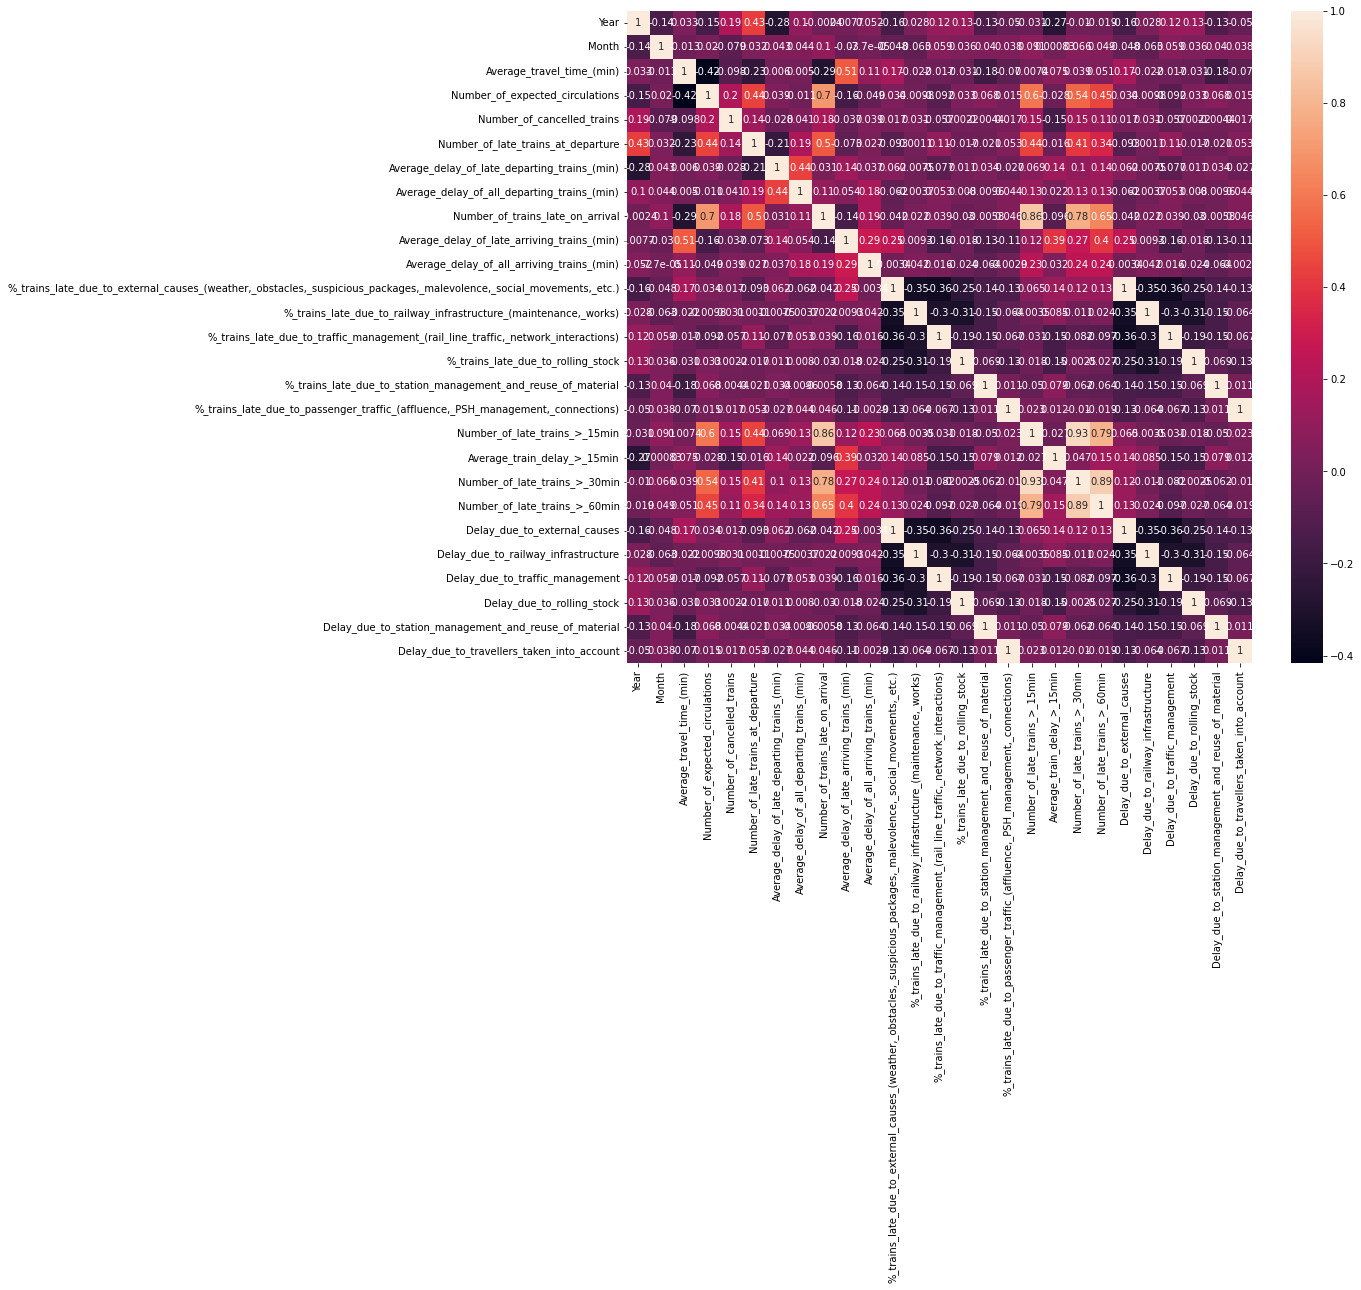

In [91]:
data_heatmap = data.drop(columns="Departure_station",axis=1)
data_heatmap = data.drop(columns="Arrival_station",axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(data_heatmap.corr(),annot=True)
plt.show()